### aula 04: Analisando nossos dados

In [58]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [79]:
df = pd.read_csv('reembolso-2019-completo.csv')

Vamos verificar a frequência dos 10 nomes de parlamentares que mais foram citados no dataset.

In [62]:
df.txNomeParlamentar.value_counts().sort_values(ascending=False).to_frame().head(10)

,txNomeParlamentar
Diego Garcia,1735
Zeca Dirceu,1623
Maria do Rosário,1540
Glauber Braga,1489
Jorge Solla,1424
Guiga Peixoto,1351
Dimas Fabiano,1330
Henrique Fontana,1325
Vitor Lippi,1308
Capitão Augusto,1267


Podemos aplicar o `values_counts` no `txtDescricao`, para identificar a frequência dos tipos de gastos.

In [64]:
df.txtDescricao.value_counts() # normalize=True

PASSAGEM AÉREA - RPA                                         81349
COMBUSTÍVEIS E LUBRIFICANTES.                                64765
SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO                    31557
MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR    22014
TELEFONIA                                                    21880
FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR                   17730
SERVIÇOS POSTAIS                                             14961
DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.                         10946
LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES                 6279
HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO FEDERAL.        5579
PASSAGEM AÉREA - SIGEPA                                       3333
PASSAGEM AÉREA - REEMBOLSO                                    3148
CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.                 2397
PASSAGENS TERRESTRES, MARÍTIMAS OU FLUVIAIS                   1136
ASSINATURA DE PUBLICAÇÕES                                     

 Em média, cada uma das 149.520 despesas teve o valor de 635 reais.

In [8]:
df["vlrLiquido"].mean()

635.5871056497791

In [35]:
df["vlrLiquido"].describe()

count    477824.000000
mean        635.587106
std        1808.260887
min       -7821.200000
25%          50.000000
50%         197.940000
75%         715.570000
max      145140.000000
Name: vlrLiquido, dtype: float64

Aqui nós podemos ver que temos valores negativos. Esse valores são referentes a bilhetes de compensação, bilhete de compensação é o bilhete aéreo não voado, que foi reembolsado à Câmara dos Deputados. Portanto, o valor relativo aos bilhetes compensados (não voados) são reembolsados/devolvidos à Casa, deduzindo-se as taxas de cancelamento e de no-show, de acordo com as regras tarifárias da companhia aérea respectiva.

Esse crédito pode voltar para a conta corrente do parlamentar mantida na companhia aérea para ser utilizado com nova emissão de passagem aérea ou poderá voltar para a CEAP do respectivo parlamentar, ficando disponível para utilização com as demais despesas.

Para entender mais, vejam a thread: https://github.com/okfn-brasil/serenata-de-amor/issues/29

Para entender melhor sobre esses valores, vamos recuperar todos os valores negativos.

In [80]:
negative_documents = df[df["vlrLiquido"] < 0]
len(negative_documents)

13029

Em teoria, para cada documento negativo, vamos ter outro documento positivo relacionado.

In [101]:
positive_documents = df[
    (df['ideDocumento'].isin(negative_documents['ideDocumento']))
    & 
    (df["vlrLiquido"] > 0)
]

In [104]:
positive_documents.iloc[0].to_frame()

,1756
Unnamed: 0,1756
txNomeParlamentar,Fausto Pinato
cpf,28022995819.0
ideCadastro,66828.0
nuCarteiraParlamentar,355.0
nuLegislatura,2019
sgUF,SP
sgPartido,PP
codLegislatura,56
numSubCota,998


Pegando o id do documento desse gasto positivo, podemos encontrar o documento com gasto negativo relacionado.

In [105]:
negative_documents[
    negative_documents['ideDocumento'] == positive_documents.iloc[0].ideDocumento
]

,Unnamed: 0,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,numEspecificacaoSubCota,txtDescricaoEspecificacao,txtFornecedor,txtCNPJCPF,txtNumero,indTipoDocumento,datEmissao,vlrDocumento,vlrGlosa,vlrLiquido,numMes,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
1755,1755,Fausto Pinato,2.802300e+10,66828.0,355.0,2019,SP,PP,56,998,PASSAGEM AÉREA - SIGEPA,0,NaN,GOL,NaN,GLLN8G,nota_fiscal,2019-11-20T12:00:00,1386.5,0.0,-1386.5,11,2019,0,Fausto Ruy Pinato,BSB/CGH,0,0.0,NaN,2917,2203,NaN


In [108]:
len(positive_documents), len(negative_documents) 

(357, 13029)

In [82]:
sample = negative_documents[negative_documents.duplicated(subset = 'ideDocumento')].iloc[1] #, keep = {‘last’, ‘first’, ‘false’)

In [83]:
df[df['ideDocumento'] == sample['ideDocumento']]

,Unnamed: 0,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,numEspecificacaoSubCota,txtDescricaoEspecificacao,txtFornecedor,txtCNPJCPF,txtNumero,indTipoDocumento,datEmissao,vlrDocumento,vlrGlosa,vlrLiquido,numMes,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
51279,51279,Jaqueline Cassol,3.512403e+10,108338.0,47.0,2019,RO,PP,56,998,PASSAGEM AÉREA - SIGEPA,0,NaN,AZUL,NaN,LGJF6D,nota_fiscal,2019-10-15T12:00:00,1424.43,0.0,-1424.43,10,2019,0,DIRLAINE JAQUELINE CASSOL,OAL/BSB,0,0.0,NaN,3434,1578,NaN
51280,51280,Jaqueline Cassol,3.512403e+10,108338.0,47.0,2019,RO,PP,56,998,PASSAGEM AÉREA - SIGEPA,0,NaN,AZUL,NaN,LGJF6D,nota_fiscal,2019-11-06T12:00:00,170.00,0.0,-170.00,11,2019,0,DIRLAINE JAQUELINE CASSOL,OAL/BSB,0,0.0,NaN,3434,1578,NaN


In [40]:
df.columns

Index(['Unnamed: 0', 'txNomeParlamentar', 'cpf', 'ideCadastro',
       'nuCarteiraParlamentar', 'nuLegislatura', 'sgUF', 'sgPartido',
       'codLegislatura', 'numSubCota', 'txtDescricao',
       'numEspecificacaoSubCota', 'txtDescricaoEspecificacao', 'txtFornecedor',
       'txtCNPJCPF', 'txtNumero', 'indTipoDocumento', 'datEmissao',
       'vlrDocumento', 'vlrGlosa', 'vlrLiquido', 'numMes', 'numAno',
       'numParcela', 'txtPassageiro', 'txtTrecho', 'numLote',
       'numRessarcimento', 'vlrRestituicao', 'nuDeputadoId', 'ideDocumento',
       'urlDocumento', 'cnpj', 'partners', 'secondary_activities', 'latitude',
       'longitude', 'opening', 'main_activity', 'neighborhood',
       'share_capital', 'zip_code', 'main_activity_code', 'city_code',
       'judicial_nature_code', 'additional_address_details',
       'removed_from_simples_since', 'opened_in', 'opted_for_comples_in',
       'situation_date', 'special_situation_date', 'fax_area_code',
       'phone1_area_code', 'phone2_are

Usando o `std` podemos entender o quanto nosso dado se desvia do 'esperado'. 

In [10]:
df["vlrLiquido"].std()

1808.2608867173467

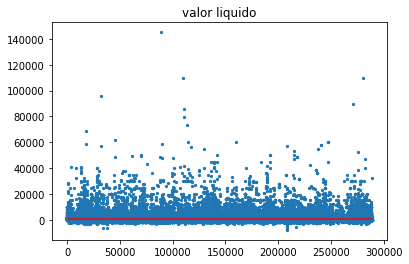

In [111]:
import matplotlib.pyplot as plt

plt.title("valor liquido")

plt.scatter(
    x=df.index, 
    y=df['vlrLiquido'],
    s=5
)
plt.hlines(
    y=df['vlrLiquido'].mean(), 
    xmin=0, 
    xmax=df['vlrLiquido'].count(), 
    color='red'
); 

In [27]:
df['vlrLiquido'].count()

477824

In [112]:
df["vlrLiquido"].describe()

count    288439.000000
mean        713.609710
std        2092.526518
min       -7821.200000
25%          49.000000
50%         185.000000
75%         690.040000
max      145140.000000
Name: vlrLiquido, dtype: float64

In [113]:
df['vlrLiquido'].sum()

205832870.99999997

In [114]:
df[df.vlrLiquido == df.vlrLiquido.max()].iloc[0]

Unnamed: 0                                                               88502
txNomeParlamentar                                                Weliton Prado
cpf                                                              84719850634.0
ideCadastro                                                           160518.0
nuCarteiraParlamentar                                                    270.0
nuLegislatura                                                             2019
sgUF                                                                        MG
sgPartido                                                                 PROS
codLegislatura                                                              56
numSubCota                                                                   5
txtDescricao                              DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.
numEspecificacaoSubCota                                                      0
txtDescricaoEspecificacao                           

In [115]:
df[df.vlrLiquido > 100000]

,Unnamed: 0,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,numEspecificacaoSubCota,txtDescricaoEspecificacao,txtFornecedor,txtCNPJCPF,txtNumero,indTipoDocumento,datEmissao,vlrDocumento,vlrGlosa,vlrLiquido,numMes,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
88502,88502,Weliton Prado,8.471985e+10,160518.0,270.0,2019,MG,PROS,56,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,0,NaN,Athalaia Grafica e Editora Ltda,2.717866e+12,12497,nota_fiscal,2019-12-20T00:00:00,145140.0,0.0,145140.0,12,2019,0,NaN,NaN,1679887,NaN,NaN,2233,7020514,https://www.camara.leg.br/cota-parlamentar/doc...
109542,109542,Professora Dorinha Seabra Rezende,4.319693e+10,160639.0,67.0,2019,TO,DEM,56,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,0,NaN,ALENCAR & MARTINS LTDA-ME,5.649338e+12,201900000003750,nota_fiscal,2019-12-11T00:00:00,109500.0,0.0,109500.0,12,2019,0,NaN,NaN,1661126,NaN,NaN,2300,6981838,https://www.camara.leg.br/cota-parlamentar/doc...
280023,280023,Raimundo Costa,1.767254e+10,204567.0,211.0,2019,BA,PL,56,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,0,NaN,ALUGUE GRAFICA LTDA,1.917955e+13,00002981,nota_fiscal,2019-11-26T23:00:00,110000.0,0.0,110000.0,11,2019,0,NaN,NaN,1656271,NaN,NaN,3426,6971267,https://www.camara.leg.br/cota-parlamentar/doc...


Maiores gastos com alimento

In [119]:
df[df.txtDescricao == 'FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR']['vlrLiquido'].max()

8000.0

In [122]:
gasto_alimentacao = df.txtDescricao == 'FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR'

alimentacao_max = df[df.txtDescricao == 'FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR']['vlrLiquido'].max()

df[gasto_alimentacao & (df.vlrLiquido == alimentacao_max)]

,Unnamed: 0,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,numEspecificacaoSubCota,txtDescricaoEspecificacao,txtFornecedor,txtCNPJCPF,txtNumero,indTipoDocumento,datEmissao,vlrDocumento,vlrGlosa,vlrLiquido,numMes,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
264,264,LIDERANÇA DO PROGRESSISTAS,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0,NaN,RONILDA FRANCISCA RIBEIRO DOS REIS,2.086913e+13,001525287,nota_fiscal,2019-11-07T23:00:00,8000.0,0.0,8000.0,10,2019,0,NaN,NaN,1651228,NaN,NaN,3461,6959055,https://www.camara.leg.br/cota-parlamentar/doc...
265,265,LIDERANÇA DO PROGRESSISTAS,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0,NaN,RONILDA FRANCISCA RIBEIRO DOS REIS,2.086913e+13,001546052,nota_fiscal,2019-11-24T23:00:00,8000.0,0.0,8000.0,11,2019,0,NaN,NaN,1655704,NaN,NaN,3461,6969841,https://www.camara.leg.br/cota-parlamentar/doc...
266,266,LIDERANÇA DO PROGRESSISTAS,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0,NaN,RONILDA FRANCISCA RIBEIRO DOS REIS,2.086913e+13,001579281,nota_fiscal,2019-12-15T23:00:00,8000.0,0.0,8000.0,12,2019,0,NaN,NaN,1663508,NaN,NaN,3461,6987099,https://www.camara.leg.br/cota-parlamentar/doc...


Datas

In [123]:
df["datEmissao"] = pd.to_datetime(
    df.datEmissao, 
    format='%Y-%m-%d'
) 

In [128]:
df.groupby('datEmissao')['vlrLiquido'].sum().mean()

14507.988275910759

In [116]:
df.groupby('txtDescricao')['vlrLiquido'].sum().to_frame()

,vlrLiquido
txtDescricao,
ASSINATURA DE PUBLICAÇÕES,275892.32
COMBUSTÍVEIS E LUBRIFICANTES.,16519513.53
"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",20457463.41
DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,49187128.01
FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,1280355.98
"HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO FEDERAL.",1765518.07
LOCAÇÃO OU FRETAMENTO DE AERONAVES,1465615.00
LOCAÇÃO OU FRETAMENTO DE EMBARCAÇÕES,105850.00
LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES,26508130.89


In [58]:
df.groupby(['sgPartido', 'sgUF', 'txNomeParlamentar'], as_index=False)\
    .aggregate({'vlrLiquido': np.sum})\
    .sort_values(by='vlrLiquido', ascending=False).head()

,sgPartido,sgUF,txNomeParlamentar,vlrLiquido
104,PDT,AC,Jesus Sérgio,543249.02
132,PL,AM,Marcelo Ramos,538354.87
46,MDB,AC,Jéssica Sales,527273.24
150,PL,PB,Wellington Roberto,519674.64
161,PL,RN,João Maia,519108.19


In [61]:
df.groupby(["txtCNPJCPF", "txtFornecedor"], as_index=False) \
    .agg({'vlrLiquido': np.nansum})\
    .sort_values(by='vlrLiquido', ascending=False)[0:20]

,txtCNPJCPF,txtFornecedor,vlrLiquido
5232,075.756.510/0015-9,Cia Aérea - GOL,5191651.49
1304,020.128.620/0016-0,Cia Aérea - TAM,4252583.10
4980,073.193.230/0019-1,PANTANAL VEÍCULOS LTDA,2487036.33
6498,092.962.950/0016-0,Cia Aérea - AZUL,1480004.21
12775,267.352.270/0017-9,GOLD CAR BRASILIA LOCADORA DE VEICULOS ME,1123325.00
1867,026.102.350/0012-0,DMD Gestão Administrativa LTDA - ME,1005000.00
1,000.000.000/0000-1,CELULAR FUNCIONAL,977500.48
1769,025.581.570/0016-2,Telefônica Brasil S. A. VIVO,790155.73
3987,054.434.490/0014-8,VERTICE - SOCIEDADE CIVIL DE PROFISSIONAIS ASS...,741500.00
1775,025.581.570/0016-2,Telefônica Brasil S.A. VIVO,629988.07
